In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer

In [280]:
pd.set_option('display.max_columns',500)
pd.set_option('display.width',500)
pd.set_option('display.max_rows', 500)

In [281]:
train = pd.read_csv('train_wn75k28.csv', parse_dates=['created_at','signup_date'])
train

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0
39157,39158,2021-12-31,3,9,3.0,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,39159,2021-12-31,8,7,2.0,NaT,1,0,0,0,1,0,1,0,0,0,0,0,0
39159,39160,2021-12-31,7,12,2.0,NaT,0,0,0,0,0,1,0,0,0,0,1,0,0


In [282]:
test = pd.read_csv('test_Wf7sxXF.csv', parse_dates=['created_at','signup_date'])
test

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaT,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,NaN,NaT,0,0,0,0,0,1,1,0,0,0,0,0
13180,52342,2022-03-30,12,8,NaN,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0
13182,52344,2022-03-30,14,10,NaN,NaT,0,0,0,0,0,0,1,0,0,0,1,0


In [283]:
sample = pd.read_csv('sample_submission_2zvVjBu.csv')
sample

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1
...,...,...
13179,52341,1
13180,52342,1
13181,52343,1
13182,52344,1


In [284]:
def details(df):
    sum_null_values = df.isnull().sum()
    percent_null_values = 100* (sum_null_values/len(df))
    data_type = df.dtypes
    unique_values = df.nunique()

    table = pd.concat([sum_null_values,percent_null_values,data_type,unique_values], axis=1)
    table_col = table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values', 2 : 'Data_Type', 3: 'Unique values'})
    return table_col

In [285]:
details(train)

,Missing Values,% of Total Missing Values,Data_Type,Unique values
id,0,0.000000,int64,39161
created_at,0,0.000000,datetime64[ns],365
campaign_var_1,0,0.000000,int64,16
campaign_var_2,0,0.000000,int64,15
products_purchased,20911,53.397513,float64,4
signup_date,15113,38.591966,datetime64[ns],1800
user_activity_var_1,0,0.000000,int64,4
user_activity_var_2,0,0.000000,int64,2
user_activity_var_3,0,0.000000,int64,2
user_activity_var_4,0,0.000000,int64,2


In [286]:
train['buy'].value_counts(dropna=False)

0    37163
1     1998
Name: buy, dtype: int64

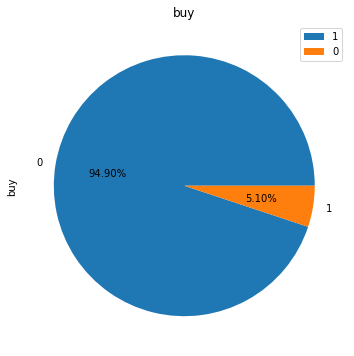

In [287]:
round(100*train['buy'].value_counts(),2).plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("buy")
plt.legend(["1", "0"])
plt.show()

This is an imbalanced dataset where 0 means not buying and 1 means buying.

In [288]:
col_cat = [i for i in train.columns if train[i].dtype == object]
col_cat

[]

In [289]:
col_num = [i for i in train.columns if train[i].dtype != object]
col_num.remove('id')
col_num.remove('created_at')
col_num.remove('signup_date')
col_num.remove('buy')

In [290]:
col_num

['campaign_var_1',
 'campaign_var_2',
 'products_purchased',
 'user_activity_var_1',
 'user_activity_var_2',
 'user_activity_var_3',
 'user_activity_var_4',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_8',
 'user_activity_var_9',
 'user_activity_var_10',
 'user_activity_var_11',
 'user_activity_var_12']

In [291]:
def catcol(df, col): 
    for cat in col:
        print(cat)
        print('--------------------------')
        print(df[cat].value_counts(dropna=False))
        print('=====================================================')

In [292]:
catcol(train,col_num)

campaign_var_1
--------------------------
6     4061
5     4060
4     4018
3     3784
7     3756
2     3486
8     3407
9     2866
10    2392
11    1873
1     1593
12    1455
13    1059
14     714
15     456
16     181
Name: campaign_var_1, dtype: int64
campaign_var_2
--------------------------
6     5744
7     5472
5     5250
8     4690
4     4213
9     3537
3     2883
10    2298
2     1788
11    1410
12     761
1      589
13     351
14     151
15      24
Name: campaign_var_2, dtype: int64
products_purchased
--------------------------
NaN    20911
2.0     8867
3.0     5024
1.0     3643
4.0      716
Name: products_purchased, dtype: int64
user_activity_var_1
--------------------------
0    23869
1    14917
2      374
3        1
Name: user_activity_var_1, dtype: int64
user_activity_var_2
--------------------------
0    38898
1      263
Name: user_activity_var_2, dtype: int64
user_activity_var_3
--------------------------
0    35134
1     4027
Name: user_activity_var_3, dtype: int64
user_a

In [293]:
train[col_num].describe(percentiles=(.01,.05,.25,.5,.75,.9,.95,.99))

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
count,39161.000000,39161.000000,18250.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000,39161.000000
mean,6.523812,6.452746,2.154137,0.400092,0.006716,0.102832,0.011465,0.151503,0.499834,0.286612,0.174434,0.011440,0.000383,0.218942,0.000562
std,3.472944,2.614296,0.779815,0.509194,0.081676,0.303743,0.106463,0.359681,0.558166,0.455784,0.379689,0.106346,0.019568,0.431544,0.023696
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.000000,8.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
90%,11.000000,10.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


outliers

In [294]:
def outlier(df, num):
    plt.figure(figsize=(15,30))
    for i in enumerate(num):
        plt.subplot(5,3,i[0]+1)
        sns.boxplot(df[i[1]])

    plt.figure(figsize=(15,30))
    for j in enumerate(num):
        plt.subplot(5,3,j[0]+1)
        sns.kdeplot(df[j[1]], color='orange')

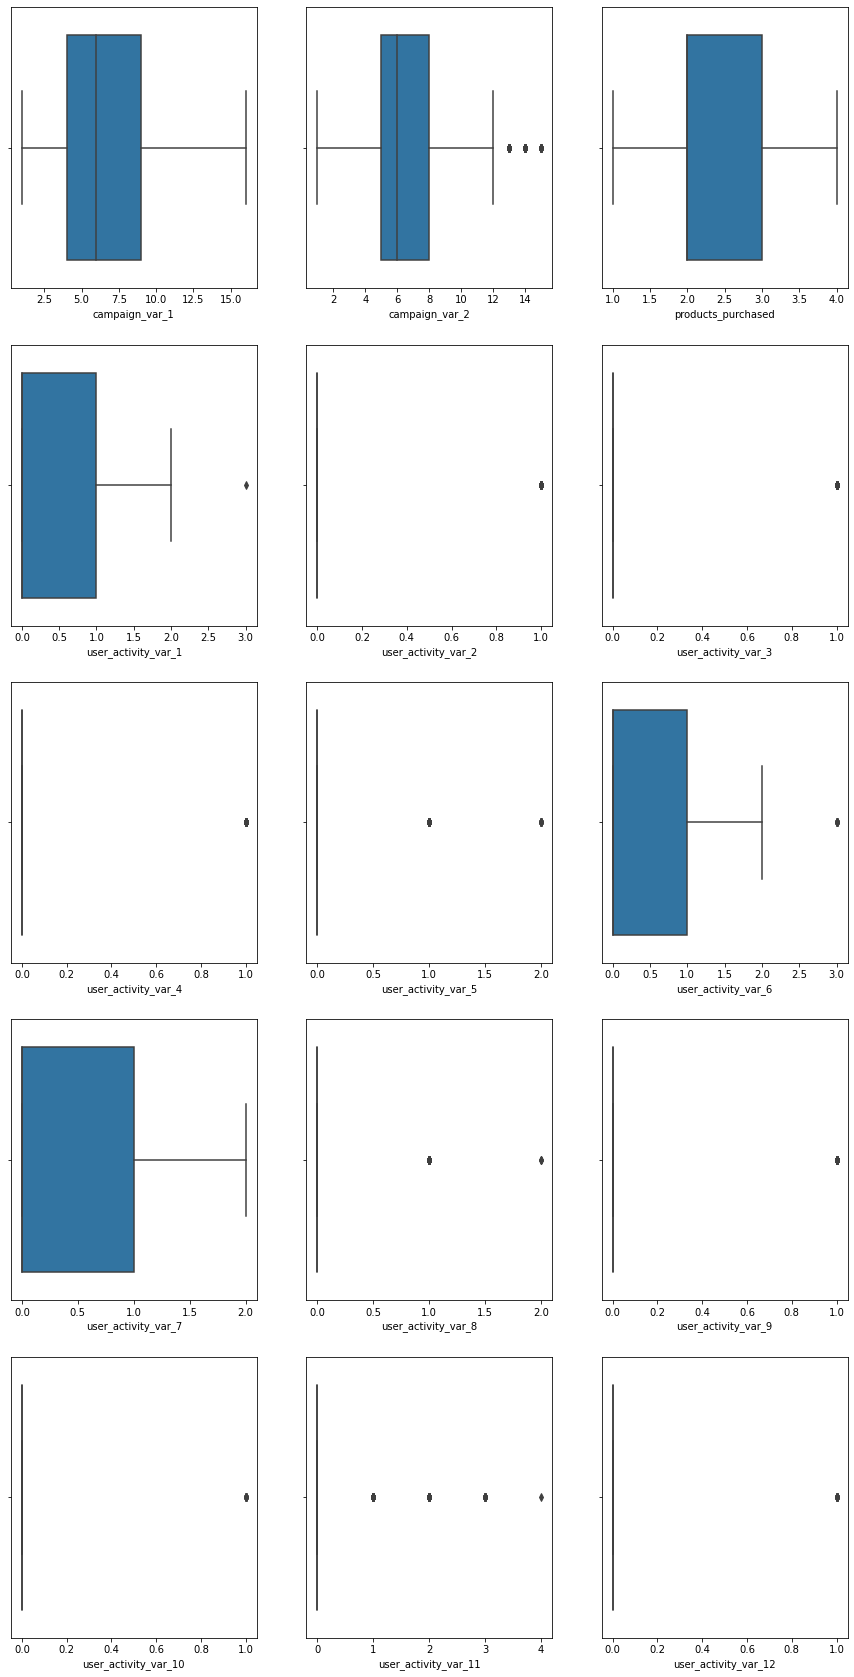

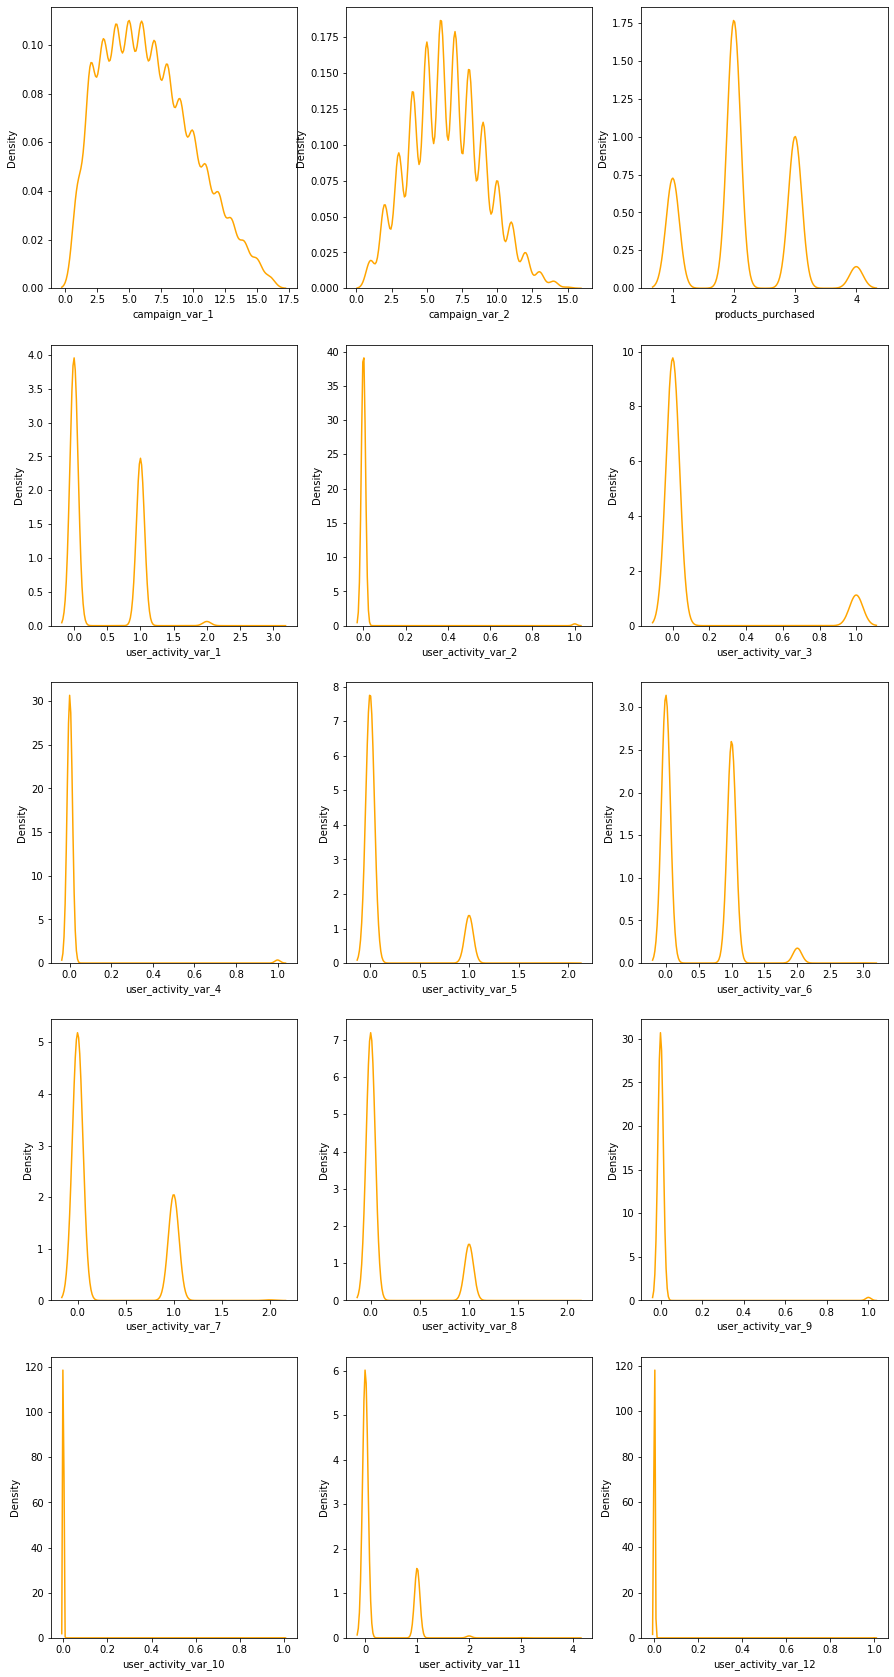

In [295]:
outlier(train,col_num)

Handling null values in numerical column

In [296]:
train.groupby(train['products_purchased'].isnull())['buy'].mean()
train['products_purchased_buy'] = np.where(train['products_purchased'].isnull(), 0, 1)
train.drop(['products_purchased'],1,inplace=True)
train

,id,created_at,campaign_var_1,campaign_var_2,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,products_purchased_buy
0,1,2021-01-01,1,2,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,1
1,2,2021-01-01,2,1,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,1
2,3,2021-01-01,9,3,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,2021-01-01,6,7,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,2021-01-01,4,6,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0,1
39157,39158,2021-12-31,3,9,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,1
39158,39159,2021-12-31,8,7,NaT,1,0,0,0,1,0,1,0,0,0,0,0,0,1
39159,39160,2021-12-31,7,12,NaT,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [297]:
train['products_purchased_buy'].value_counts()

0    20911
1    18250
Name: products_purchased_buy, dtype: int64

Handling null values in date column